In [11]:
# checking the distribution of scores per population:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
os.getcwd()

'/Users/zachleon/Desktop'

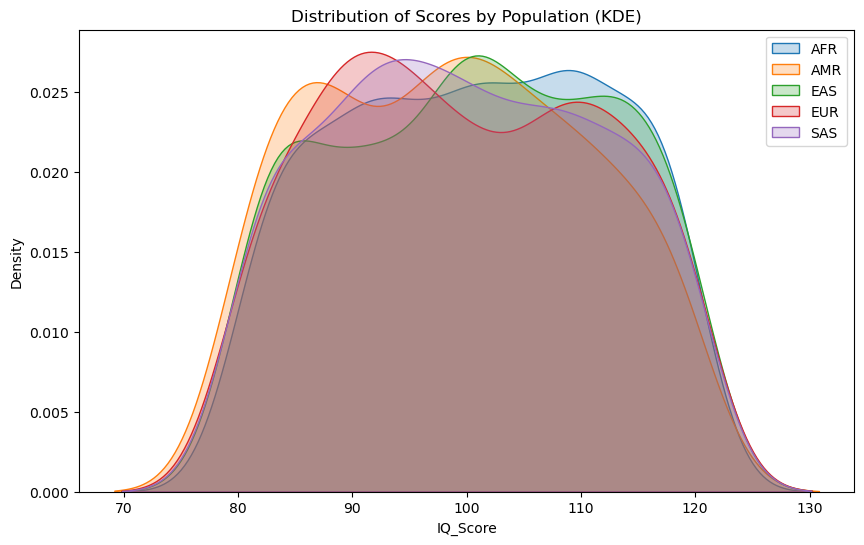

In [13]:
directory = "supergroups/"
# List to store dataframes
dataframes = []
# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith("_qt.phe"):
        filepath = os.path.join(directory, filename)

        # Read the file into a dataframe
        df = pd.read_csv(filepath, delim_whitespace=True, header=None, names=["ID1", "ID2", "Score"])

        # Extract the population from the filename
        population = filename.split("_")[0]

        # Add a new column with the population information
        df['Population'] = population

        # Append the dataframe to the list
        dataframes.append(df)

# Concatenate all dataframes into one
merged_df = pd.concat(dataframes, ignore_index=True)

# Create a pivot table to get scores in separate columns by population
pivot_df = merged_df.pivot(columns='Population', values='Score')

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Use seaborn to create KDE plots
for population in pivot_df.columns:
    sns.kdeplot(pivot_df[population].dropna(), label=population, fill=True)

plt.title("Distribution of Scores by Population (KDE)")
plt.xlabel("IQ_Score")
plt.ylabel("Density")
plt.legend()
plt.show()